In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

df = pd.read_csv('data_analysic.csv', encoding='cp1252')
df.head()

,Review,date,Location
0,I was very impressed with the resort.\nGreat s...,20-08-2019,Sebastian
1,The rooms were nice the outside needs work als...,20-08-2019,Los Angeles
2,Great location! I have stayed at this hotel on...,20-08-2019,Georgia
3,The hotel was adequate for my stay. The strips...,20-08-2019,NaN
4,"Great location, room was large and spacious. P...",19-08-2019,Palm Harbor


In [3]:
df.Location.unique()

array(['Sebastian', 'Los Angeles', 'Georgia', ..., 'India', 'Malaysia',
       'Trinidad and Tobago'], dtype=object)

In [4]:
df.Review = df.Review.apply(lambda x: str(x))

In [5]:
df.Review = df.Review.apply(lambda x: x.replace('\n', ' '))

In [6]:
df.head()

,Review,date,Location
0,I was very impressed with the resort. Great st...,20-08-2019,Sebastian
1,The rooms were nice the outside needs work als...,20-08-2019,Los Angeles
2,Great location! I have stayed at this hotel on...,20-08-2019,Georgia
3,The hotel was adequate for my stay. The strips...,20-08-2019,NaN
4,"Great location, room was large and spacious. P...",19-08-2019,Palm Harbor


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6448 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [8]:
# Testing sentiment analysis using TextBlob

TextBlob("The food was amazing").sentiment

Sentiment(polarity=0.6000000000000001, subjectivity=0.9)

In [10]:
df.shape

(6448, 3)

In [11]:
polarity = []

subjectivity = []

for i in df['Review'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
    except:
        polarity.append(0)
        subjectivity.append(0)
        

In [13]:
df['polarity'] = polarity
df['subjectivity'] = subjectivity

In [14]:
df.head()

,Review,date,Location,polarity,subjectivity
0,I was very impressed with the resort. Great st...,20-08-2019,Sebastian,0.437037,0.553333
1,The rooms were nice the outside needs work als...,20-08-2019,Los Angeles,0.229167,0.489583
2,Great location! I have stayed at this hotel on...,20-08-2019,Georgia,0.293939,0.367576
3,The hotel was adequate for my stay. The strips...,20-08-2019,NaN,0.118333,0.435000
4,"Great location, room was large and spacious. P...",19-08-2019,Palm Harbor,0.336565,0.454082


In [15]:
#Displaying the hotesls with Netural review.
df[df['polarity'] == 0]

,Review,date,Location,polarity,subjectivity
33,nan,17-08-2019,"Grand Cayman, Cayman Islands",0.0,0.0
263,nan,27-07-2019,Oregon,0.0,0.0
560,nan,01-07-2019,Maryland has,0.0,0.0
877,nan,22-05-2019,NaN,0.0,0.0
1034,nan,11-05-2019,NaN,0.0,0.0
...,...,...,...,...,...
6413,·great location,19-07-2019,Canada,0.0,0.0
6414,·location to mgh ·we were not told that a ...,19-07-2019,United States of America,0.0,0.0
6420,·location ·the cleaning crew forgot their ...,17-07-2019,Greece,0.0,0.0
6425,·pool wasn't crowded,16-07-2019,United States of America,0.0,0.0


In [25]:
df[df['polarity'] == 0].head(10)

,Review,date,Location,polarity,subjectivity
33,nan,17-08-2019,"Grand Cayman, Cayman Islands",0.0,0.0
263,nan,27-07-2019,Oregon,0.0,0.0
560,nan,01-07-2019,Maryland has,0.0,0.0
877,nan,22-05-2019,NaN,0.0,0.0
1034,nan,11-05-2019,NaN,0.0,0.0
1091,nan,07-05-2019,Gallipoli is a small Island with a Radius of 500m,0.0,0.0
1114,nan,06-05-2019,NaN,0.0,0.0
1150,nan,03-05-2019,NaN,0.0,0.0
1217,nan,29-04-2019,NaN,0.0,0.0
1244,nan,27-04-2019,NaN,0.0,0.0


In [29]:
#Displaying highly subjective reviews
df[df['subjectivity'] > 0.8].head(10)

,Review,date,Location,polarity,subjectivity
4911,Property not a nice as pictured. Property not ...,04-09-2018,San Jose,-0.183333,0.820833
5386,What a great palace woww... Is was a veerry vw...,01-12-2018,NaN,0.750000,0.812500
5430,I was very pleased with Resort. It’s a beautif...,01-08-2018,NaN,0.654286,0.828571
5433,Wyndham Grand Orlando Resort Bonnet Creek is a...,01-08-2018,NaN,0.025000,0.833333
5443,The stay at the Wyndham Grand was all in all a...,01-09-2018,NaN,0.469444,0.825000
5448,"From check in to check out, the hospitality wa...",01-09-2018,NaN,0.541667,0.896429
5451,Stayed at this resort during Labor Day Weekend...,01-10-2018,NaN,0.400000,0.900000
5482,I return to this hotel every year for the West...,01-02-2019,NaN,0.666667,0.805556
5487,"Everyone from the doorman, bellman, front desk...",01-02-2019,NaN,-0.175000,0.875000
5618,"If you're looking for a 3 or 4 star hotel, thi...",Dec-18,NaN,0.455556,0.888889


In [30]:
#Displaying highly positive reviews
df[df['polarity'] > 0.8].head(10)

,Review,date,Location,polarity,subjectivity
5643,I stayed because I didn't get a chance to take...,Aug-18,NaN,0.850,0.812500
5941,A bit dated but excellent for the price Had a ...,Jun-19,NaN,0.900,0.916667
6102,A really good location and some great views fr...,Oct-18,NaN,0.900,0.783333
6184,"Pool area and pool bar are excellent, the room...",Jul-19,NaN,0.850,0.800000
6361,·very good emplacement to visit boston ·no...,31-07-2019,United States of America,0.875,0.600000
6369,·it is a beautiful hotel in a great location. ...,30-07-2019,United States of America,0.825,0.875000
6411,·bed was great! ·one of the front desk lad...,19-07-2019,United States of America,1.000,0.750000
6429,·lovely lively welcome on arrival. ·didn't...,15-07-2019,Ireland,1.000,0.900000
6431,·nice staff family close to the airport after ...,15-07-2019,United States of America,0.875,0.600000


In [44]:
#Displaying highly negative reviews
df[df['polarity'] < -0.5].head(10)

,Review,date,Location,polarity,subjectivity
5781,"Hotel is dated, the pool is under construction...",Mar-19,NaN,-0.890000,0.855000
6083,Get a room with a balcony to see the fireworks...,Jun-19,NaN,-0.563333,0.806667
6152,What a depressing place. We had to get a last ...,Nov-18,NaN,-0.533333,0.655556
6258,"Already informed staff, but slow response and ...",Jul-19,NaN,-0.533333,0.666667
6312,·the hotel entrance dirty and has a stale smel...,11-08-2019,United States of America,-0.550000,0.650000
6366,·pool was dirty,30-07-2019,United Kingdom,-0.600000,0.800000
6367,·location. ·the coffee maker in my room wa...,30-07-2019,China,-0.780000,1.000000


<AxesSubplot:>

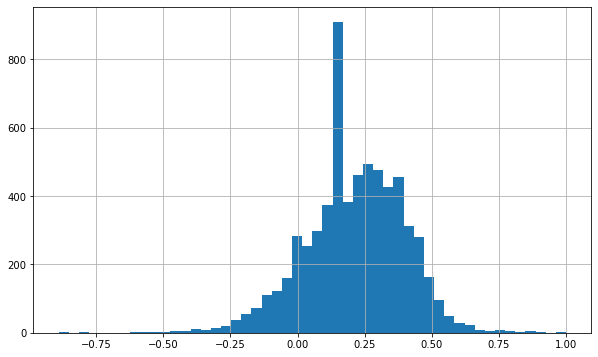

In [47]:
#Distribution of Polarity
df.polarity.hist(bins=50, figsize = (10,6))

<AxesSubplot:>

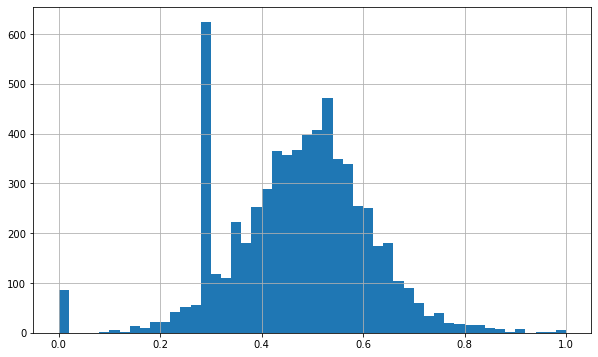

In [49]:
#Distribution of Subjectivity
df.subjectivity.hist(bins=50, figsize = (10,6))


In [51]:
#Converting the polarity values from continuous to categorical
df['polarity'][df.polarity==0]= 0
df['polarity'][df.polarity > 0]= 1
df['polarity'][df.polarity < 0]= -1

C:\Users\qcesa\AppData\Local\Temp/ipykernel_18400/1296852586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][df.polarity==0]= 0
C:\Users\qcesa\AppData\Local\Temp/ipykernel_18400/1296852586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][df.polarity > 0]= 1
C:\Users\qcesa\AppData\Local\Temp/ipykernel_18400/1296852586.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][df.polarity < 0]

 1.0    5616
-1.0     742
 0.0      90
Name: polarity, dtype: int64

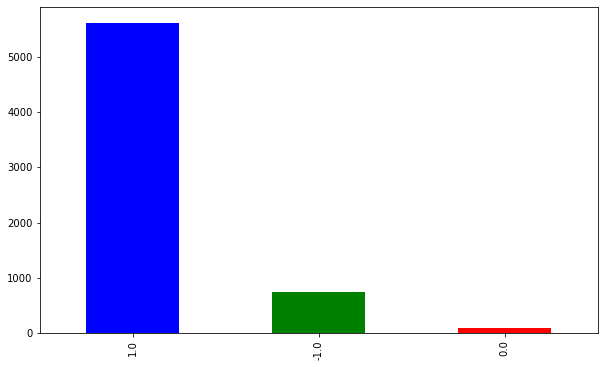

In [55]:
#Calculating the count of Positive, Negative & Neutral comments
df.polarity.value_counts().plot.bar(color = ['blue', 'green', 'red'], figsize = (10,6))
df.polarity.value_counts()